In [2]:
# === Step 1: Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Optional: tidy up warnings & display/plot defaults
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
sns.set_theme(style="whitegrid")  # optional


In [3]:
# === Step 2: Load the Dataset ===

# Path to your CSV file (adjust if it's in a different folder)
file_path = "/content/drive/MyDrive/Machine Learning Project/Instamart/instamart_csv.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Basic info about the dataset
print("✅ Data Loaded Successfully!\n")
print("Shape of the dataset:", df.shape)
print("\n--- Columns in the dataset ---")
print(df.columns.tolist())

# Quick peek at the data
print("\n--- First 5 Rows ---")
print(df.head())


✅ Data Loaded Successfully!

Shape of the dataset: (8523, 12)

--- Columns in the dataset ---
['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']

--- First 5 Rows ---
  Item Fat Content Item Identifier              Item Type  Outlet Establishment Year Outlet Identifier  \
0          Regular           FDX32  Fruits and Vegetables                       2012            OUT049   
1          Low Fat           NCB42     Health and Hygiene                       2022            OUT018   
2          Regular           FDR28           Frozen Foods                       2016            OUT046   
3          Regular           FDL50                 Canned                       2014            OUT013   
4          Low Fat           DRI25            Soft Drinks                       2015            OUT045   

  Outlet Location Type Outlet Size   

In [4]:
# === Step 3: Basic Data Exploration ===

#  Overview of data types and non-null counts
print("\n--- Dataset Info ---")
df.info()

#  Summary statistics for numeric columns
print("\n--- Summary Statistics (Numeric Columns) ---")
print(df.describe().T)

#  Checking for missing values
print("\n--- Missing Values ---")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])

#  Checking for duplicates
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates}")

#  Basic unique counts for object columns
print("\n--- Unique Value Counts (Categorical Columns) ---")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

--- Summary Statistics

In [8]:
# === Step 4: Visualize Data Using Subplots (Simple) ===

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)




Numeric Columns: ['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']
Categorical Columns: ['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type']


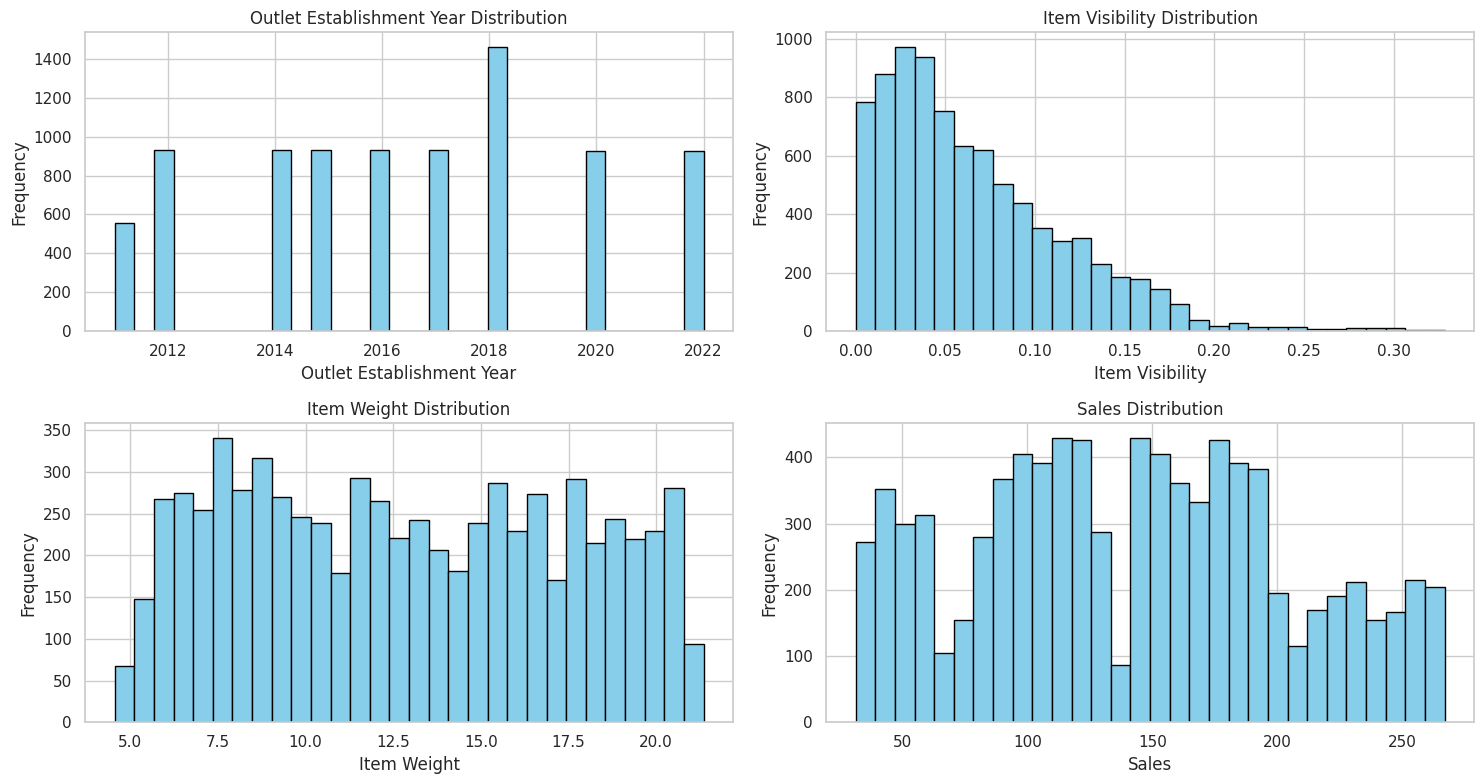

In [10]:
# ---  Numeric Columns: Histograms ---
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:4]):  # show first 4 numeric columns
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



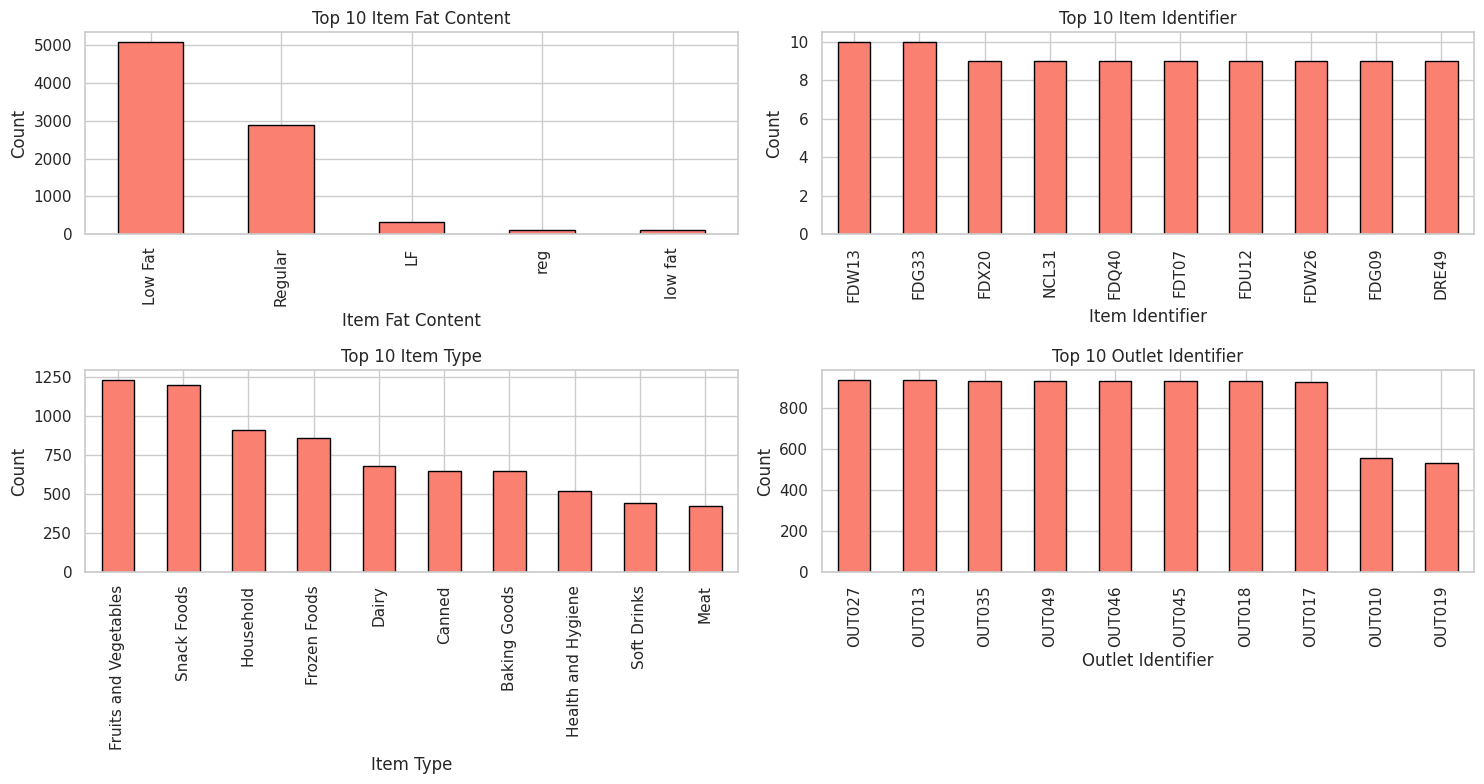

In [11]:
# --- Categorical Columns: Bar Charts ---
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols[:4]):  # show first 4 categorical columns
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().head(10).plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Top 10 {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [12]:
# Check missing values again
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())


--- Missing Values Before Cleaning ---
Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [13]:
# === Step 5: Data Cleaning (Simple Version) ===

# Handle missing values
# Fill numeric columns with median
df["Item Weight"] = df["Item Weight"].fillna(df["Item Weight"].median())


# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Fix text inconsistencies (example)
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})




In [16]:
# Confirm cleaning
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())
print("\nMissing values after cleaning:", df.isnull().sum().sum())
print("\nDuplicates remaining:", df.duplicated().sum())


--- Missing Values Before Cleaning ---
Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

Missing values after cleaning: 0

Duplicates remaining: 0


In [17]:
# === Step 7: Simple Data Analysis ===

print("📊 Basic Sales Insights\n")

#  Overall average sales
if 'Sales' in df.columns:
    print("Average Sales:", round(df['Sales'].mean(), 2))
    print("Highest Sales:", round(df['Sales'].max(), 2))
    print("Lowest Sales:", round(df['Sales'].min(), 2))

#  Top 5 Item Types by total sales
if 'Item Type' in df.columns and 'Sales' in df.columns:
    top_items = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Item Types by Total Sales:\n", top_items)

#  Average Sales by Outlet Type
if 'Outlet Type' in df.columns and 'Sales' in df.columns:
    outlet_sales = df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False)
    print("\nAverage Sales by Outlet Type:\n", outlet_sales)

#  Average Sales by Outlet Location Type
if 'Outlet Location Type' in df.columns and 'Sales' in df.columns:
    location_sales = df.groupby('Outlet Location Type')['Sales'].mean().sort_values(ascending=False)
    print("\nAverage Sales by Outlet Location Type:\n", location_sales)


📊 Basic Sales Insights

Average Sales: 140.99
Highest Sales: 266.89
Lowest Sales: 31.29

Top 5 Item Types by Total Sales:
 Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Name: Sales, dtype: float64

Average Sales by Outlet Type:
 Outlet Type
Supermarket Type2    141.678638
Supermarket Type1    141.213895
Grocery Store        140.294690
Supermarket Type3    139.801791
Name: Sales, dtype: float64

Average Sales by Outlet Location Type:
 Outlet Location Type
Tier 2    141.167198
Tier 3    140.935234
Tier 1    140.870106
Name: Sales, dtype: float64


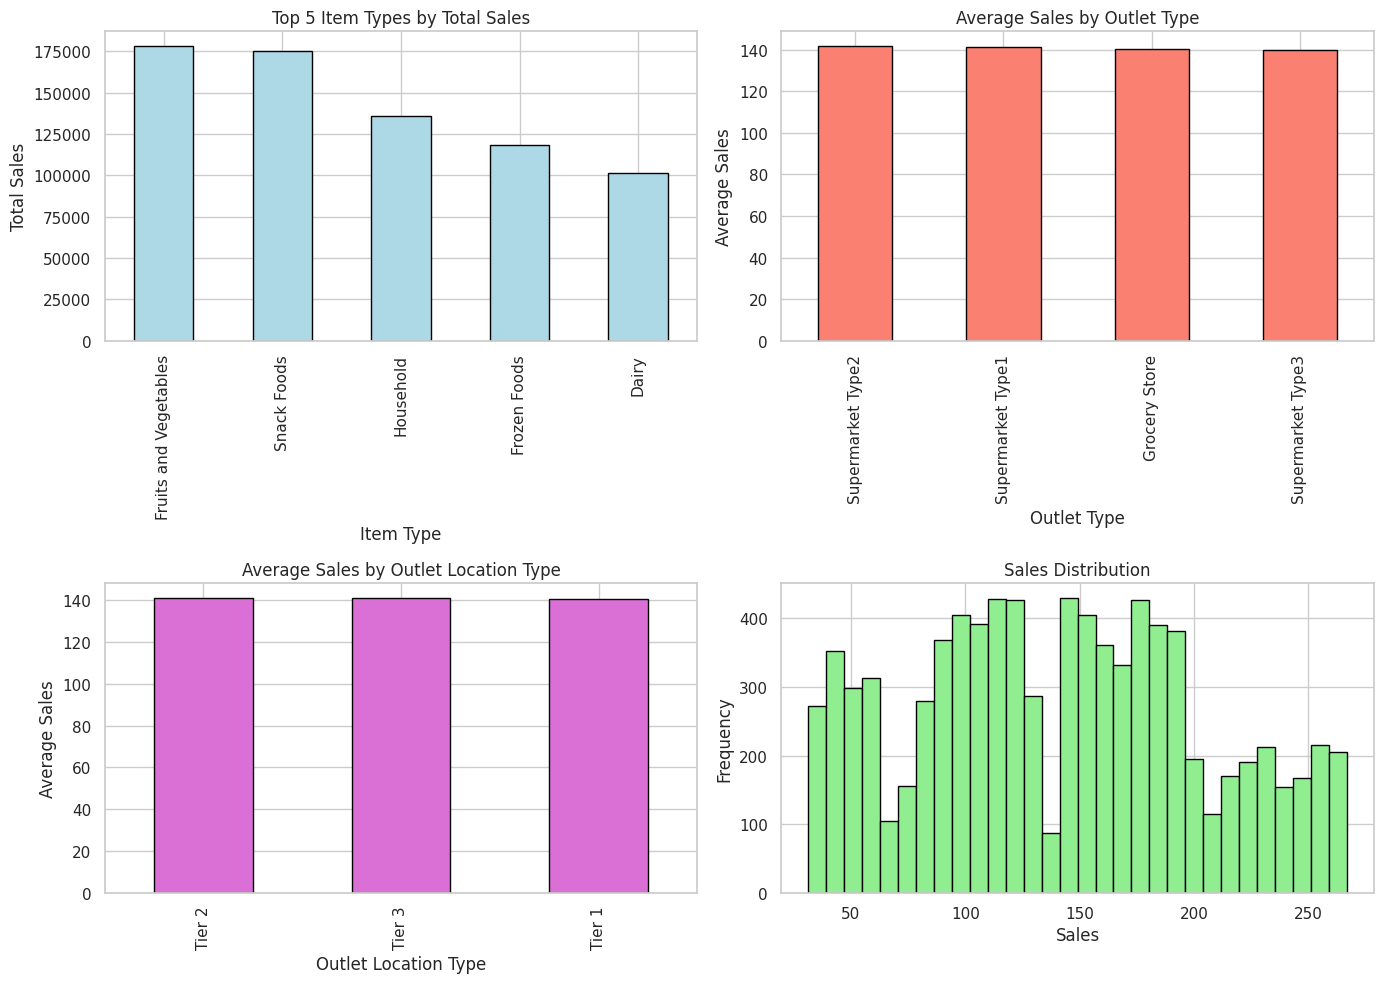

In [19]:
# === Step 8 (Simplified Dashboard View) ===

plt.figure(figsize=(14, 10))

#  Top 5 Item Types by Total Sales
plt.subplot(2, 2, 1)
df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 5 Item Types by Total Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

#  Average Sales by Outlet Type
plt.subplot(2, 2, 2)
df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')

#  Average Sales by Outlet Location Type
plt.subplot(2, 2, 3)
df.groupby('Outlet Location Type')['Sales'].mean().sort_values(ascending=False).plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Average Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Sales')

#  Sales Distribution
plt.subplot(2, 2, 4)
plt.hist(df['Sales'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
# === Step 9: Save Cleaned Data ===

# Save cleaned dataset
df.to_csv("cleaned_instamart.csv", index=False)
print("✅ Cleaned data saved as cleaned_instamart.csv")

# Save a small summary
summary = {
    "Average Sales": df['Sales'].mean(),
    "Highest Sales": df['Sales'].max(),
    "Lowest Sales": df['Sales'].min()
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
summary_df.to_csv("sales_summary.csv", index=False)
print("✅ Summary saved as sales_summary.csv")


✅ Cleaned data saved as cleaned_instamart.csv
✅ Summary saved as sales_summary.csv
